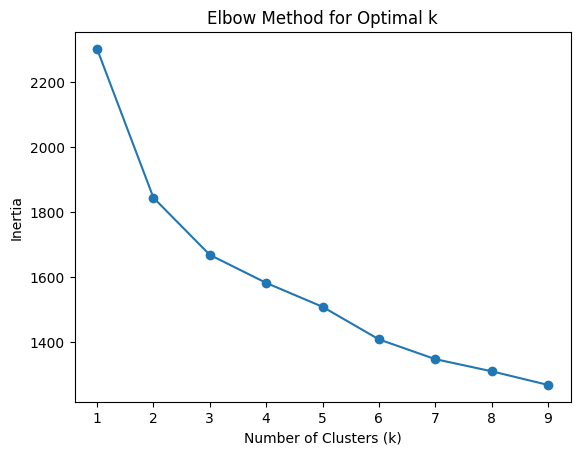

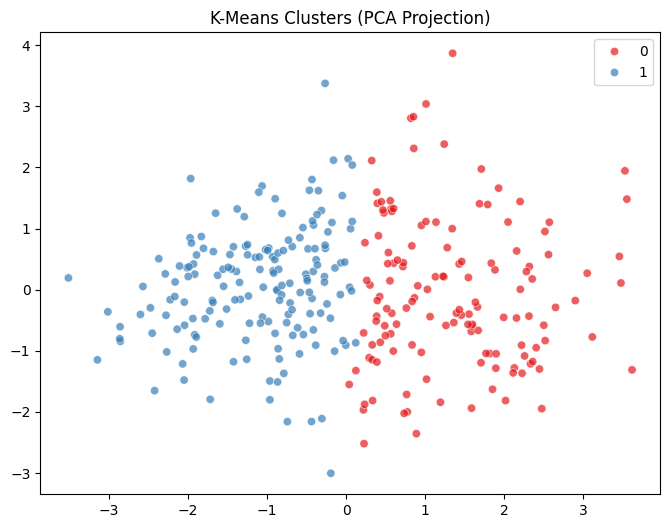

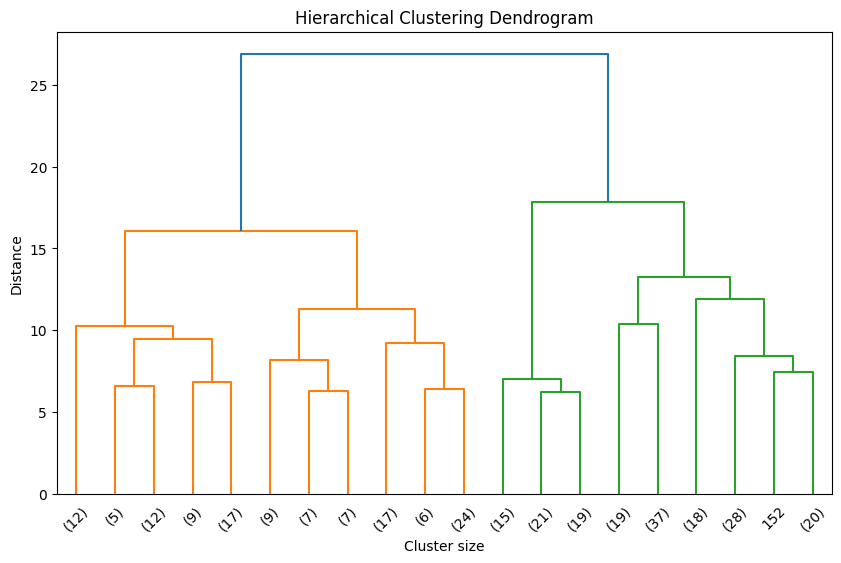


Cluster distribution vs actual disease labels:
num        0   1   2   3   4
Cluster                     
0         36  29  30  30  12
1        128  26   6   5   1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# 1. Load selected features dataset
df = pd.read_csv("../data/selected_features.csv")

X = df.drop("num", axis=1)
y = df["num"]  # used only for comparison, not for clustering

# 2. Dimensionality reduction for visualization (2D PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# 3. K-Means Clustering
# Elbow method to choose k
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.savefig("../results/kmeans_elbow.png", dpi=300, bbox_inches="tight")
plt.show()

# Choose k=2 (likely: disease vs no disease)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters to dataframe
df["Cluster"] = clusters

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", alpha=0.7)
plt.title("K-Means Clusters (PCA Projection)")
plt.savefig("../results/kmeans_clusters.png", dpi=300, bbox_inches="tight")
plt.show()

# 4. Hierarchical Clustering
linked = linkage(X, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.savefig("../results/hierarchical_dendrogram.png", dpi=300, bbox_inches="tight")
plt.show()

# 5. Compare clusters with actual disease labels
print("\nCluster distribution vs actual disease labels:")
print(pd.crosstab(df["Cluster"], y))
